In [1]:
!pip3 install -U pandas
import pandas as pd
import bs4 as bs
!pip install xlsxwriter
import xlsxwriter
import re
import csv
from datetime import datetime, timedelta
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


Аудио-файлы скачаны с сайта: https://www.jamendo.com по категориям pop и rock

Составление датасетов для разметки:

In [ ]:
import os
import pandas as pd

def collect_audio_data(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            try:
                song, artist = filename[:-4].split("_-_")  # удаляем ".wav" и разделяем по "_-_"
                data.append({"song": song, "artist": artist})
            except ValueError:
                print(f"Ошибка в названии файла: {filename}")
    df = pd.DataFrame(data)

    return df


directory = "/content/true_pop"
df_pop = collect_audio_data(directory)
df_pop.to_csv("pop_dataset.csv", index=False)


print(df_pop.head())
print(len(df_pop))


                   song         artist
0            Find_A_Way        THE_DLX
1        Crash_and_Burn           JARA
2       Come_On_Come_On  Tamara_Laurel
3                 Roses           JEKK
4  Meant_To_Be_This_Way   Square_a_Saw
51


In [ ]:
import os
import pandas as pd

def collect_audio_data(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):
            try:
                song, artist = filename[:-4].split("_-_")  # удаляем ".wav" и разделяем по "_-_"
                data.append({"song": song, "artist": artist})
            except ValueError:
                print(f"Ошибка в названии файла: {filename}")
    df = pd.DataFrame(data)

    return df


directory = "/content/true_rock"
df_rock = collect_audio_data(directory)
df_rock.to_csv("rock_dataset.csv", index=False)


print(df_rock.head())
print(len(df_rock))


                song                  artist
0              Scars       The_Morning_Light
1  Swimming_Upstream          CrumbSnatchers
2                Boy           The_Different
3    Randall_Scandal                    Maze
4          Graveyard  The_Liquid_Kitchen_(3)
52


По факту данные уже размечены, так как они изначально разделены на две отличные друг от друга категории и уже из них составлены отдельные датасеты, с которыми потом можно будет сверяться

Немного предобработаем и почистим данные

In [ ]:
df1 = pd.read_csv('/content/rock_dataset.csv') #df1 - rock
df1.head(20)

,song,artist
0,Scars,The_Morning_Light
1,Swimming_Upstream,CrumbSnatchers
2,Boy,The_Different
3,Randall_Scandal,Maze
4,Graveyard,The_Liquid_Kitchen_(3)
5,Kill_the_Old,theleague
6,Designer_Genes,The_Bourgeois
7,Mercurial_(Feat._AJ_Perdomo),Color_Out
8,Summer,Rusty_Tea_Makers
9,Wage_War,Circa_Vitae


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    52 non-null     object
 1   artist  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [ ]:
# Функция для очистки от нижнего подчеркивания и чисел в скобках
def clean_text(text):
    return re.sub(r'_\([^)]*\)', '', text)

In [ ]:
df1['song'] = df1['song'].apply(clean_text)
df1['artist'] = df1['artist'].apply(clean_text)

df1['song'] = df1['song'].str.replace('_', ' ')
df1['artist'] = df1['artist'].str.replace('_', ' ')


# Удаляем дубликаты
df1_cleaned = df1.drop_duplicates()

# Вывод очищенного DataFrame
print(df1_cleaned)


                            song                         artist
0                          Scars              The Morning Light
1              Swimming Upstream                 CrumbSnatchers
2                            Boy                  The Different
3                Randall Scandal                           Maze
4                      Graveyard             The Liquid Kitchen
5                   Kill the Old                      theleague
6                 Designer Genes                  The Bourgeois
7                      Mercurial                      Color Out
8                         Summer               Rusty Tea Makers
9                       Wage War                    Circa Vitae
10           Under My Red Carpet              The Morning Light
11                  Likely Story            Great White Buffalo
12                        Embers                       Avercage
13                  Heart of War            Message From Sylvia
14           Cheat On Each Other        

In [ ]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    52 non-null     object
 1   artist  52 non-null     object
dtypes: object(2)
memory usage: 960.0+ bytes


In [ ]:
df2 = pd.read_csv('/content/pop_dataset.csv') #df2 - pop
df2.head(20)

,song,artist
0,Find_A_Way,THE_DLX
1,Crash_and_Burn,JARA
2,Come_On_Come_On,Tamara_Laurel
3,Roses,JEKK
4,Meant_To_Be_This_Way,Square_a_Saw
5,Last_Song,The_Jaygles
6,Paradise,Songwriterz_(2)
7,When_the_snow_falls...,Ralf_G.
8,Fell_In_Love_With_Summer,Songwriterz_(2)
9,All_For_Nothing,Anthem_of_Rain


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    51 non-null     object
 1   artist  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [ ]:
df2['song'] = df2['song'].apply(clean_text)
df2['artist'] = df2['artist'].apply(clean_text)

df2['song'] = df2['song'].str.replace('_', ' ')
df2['artist'] = df2['artist'].str.replace('_', ' ')


# Удаляем дубликаты
df2_cleaned = df2.drop_duplicates()

# Вывод очищенного DataFrame
print(df2_cleaned)

                         song                                      artist
0                  Find A Way                                     THE DLX
1              Crash and Burn                                        JARA
2             Come On Come On                               Tamara Laurel
3                       Roses                                        JEKK
4        Meant To Be This Way                                Square a Saw
5                   Last Song                                 The Jaygles
6                    Paradise                                 Songwriterz
7      When the snow falls...                                     Ralf G.
8    Fell In Love With Summer                                 Songwriterz
9             All For Nothing                              Anthem of Rain
10              Dance With Me                            THE SAME PERSONS
11            Strictly Luxury                                   lillywolf
12                   The Walk         

In [ ]:
df2_cleaned['artist'] = df2_cleaned['artist'].str.split('-').str[0]
print(df2_cleaned)

                         song                      artist
0                  Find A Way                     THE DLX
1              Crash and Burn                        JARA
2             Come On Come On               Tamara Laurel
3                       Roses                        JEKK
4        Meant To Be This Way                Square a Saw
5                   Last Song                 The Jaygles
6                    Paradise                 Songwriterz
7      When the snow falls...                     Ralf G.
8    Fell In Love With Summer                 Songwriterz
9             All For Nothing              Anthem of Rain
10              Dance With Me            THE SAME PERSONS
11            Strictly Luxury                   lillywolf
12                   The Walk                        JARA
13                   Dame Más                Alfonso Lugo
14              Dance tonight                     Lollita
15                     Better                Square a Saw
16            

In [ ]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   song    51 non-null     object
 1   artist  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


 Задача:классификация по поиску похожих исполнителей (двух разных жанров) на основе аудиозаписей

Предобработка аудио

In [2]:
!pip3 install torchaudio
import torchaudio
import torch

In [15]:
import os
from pathlib import Path
import librosa
path = Path('/content/drive/MyDrive/audios')

audios = []
labels = []
for filename in os.listdir(path):
        if filename.endswith(".wav"):
            audio_path = os.path.join(path, filename)
            print(f'loading {filename}')

            wave, sample_rate = librosa.load(audio_path)
            audios.append(torch.Tensor(wave))
            artist = filename.split("_-_")[1][:-4] #Используем  имя исполнителя как метку
            labels.append(artist)

loading A_Virtual_Friend_-_Clair_Obscur.wav
loading B_U_R_N_-_bessonnitsa.wav
loading Alone_-_Nehilo_-_Nehilo.wav
loading All_For_Nothing_-_Anthem_of_Rain.wav
loading Adventure_-_madelyniris_(2).wav
loading Dame_Más_(acoustic)_-_Alfonso_Lugo.wav
loading Criminal_-_Axl_amp_Arth.wav
loading Crash_and_Burn_-_JARA.wav
loading Come_On_Come_On_-_Tamara_Laurel.wav
loading Chocolate_-_Alfonso_Lugo.wav
loading Better_-_Square_a_Saw.wav
loading Baby_Bird_-_LZYBY.wav
loading Dance_With_Me_-_THE_SAME_PERSONS.wav
loading Dance_with_me_-_Manhat10.wav
loading Dance_tonight_-_Lollita_(2).wav
loading Don't_You_Steal_My_Groove_-_Neon_NiteClub_(2).wav
loading Do_You_Still_Dream_-_Explosive_Ear_Candy.wav
loading Do_You_Ever_Feel_Sorry_-_the.madpix.project.wav
loading Dark_Horse_-_Bella_Ruse.wav
loading Find_A_Way_-_THE_DLX.wav
loading Fell_In_Love_With_Summer_-_Songwriterz_(2).wav
loading Everybody_On_Your_Block_-_lillywolf.wav
loading Eight_or_Nine_-_Jonathan_Dimmel.wav
loading Dreams_-_Manhat10.wav
loa

In [16]:
len(audios)

102

In [17]:
print(labels) #Полученный массив меток исполнителей

['Clair_Obscur', 'bessonnitsa', 'Ne', 'Anthem_of_Rain', 'madelyniris_(2)', 'Alfonso_Lugo', 'Axl_amp_Arth', 'JARA', 'Tamara_Laurel', 'Alfonso_Lugo', 'Square_a_Saw', 'LZYBY', 'THE_SAME_PERSONS', 'Manhat10', 'Lollita_(2)', 'Neon_NiteClub_(2)', 'Explosive_Ear_Candy', 'the.madpix.project', 'Bella_Ruse', 'THE_DLX', 'Songwriterz_(2)', 'lillywolf', 'Jonathan_Dimmel', 'Manhat10', 'JARA', 'lillywolf', 'Michael_McEachern', 'Bellevue', 'The_ARTISANS', 'Seth_Power_(2)', 'Square_a_Saw', 'Square_a_Saw', 'Robert_Avellanet_(2)', 'Ben_Lvcas', 'The_Jaygles', 'EGOR_BUDENNYY', 'Songwriterz_(2)', 'Sydney_Leigh', 'Arrow_amp_Olive', 'MODUS', 'Explosive_Ear_Candy', 'Eliot_Feldman--online-audio-convert.com(1)', 'JARA', 'JARA', 'lillywolf', 'Liz_Turner', 'Mercury_amp_The_Architects', 'JEKK', 'Vince_Miranda', 'Ralf_G.', 'Virgin_Joy--online-audio-convert.com', 'Whalers_(2)', 'The_Different', 'Color_Out', 'bradsucks', 'Kara_Square_and_Piero_Peluche', 'Avercage', 'Michael_Ellis', 'The_Bourgeois', 'Falling_Blind', 'N

In [18]:
print(len(labels))

102


In [20]:
#сохраняем метки в файл
with open("artist_labels.txt", "w") as file:
    for name in labels:
        file.write(name + "\n")  # Записываем имя в файл, добавляя перевод строки

print("Список сохранен в файл.")

Список сохранен в файл.


In [6]:
# Загрузка списка из текстового файла
with open("artist_labels.txt", "r") as file:
    labels = [line.strip() for line in file]

print(labels)


['Clair_Obscur', 'bessonnitsa', 'Ne', 'Anthem_of_Rain', 'madelyniris_(2)', 'Alfonso_Lugo', 'Axl_amp_Arth', 'JARA', 'Tamara_Laurel', 'Alfonso_Lugo', 'Square_a_Saw', 'LZYBY', 'THE_SAME_PERSONS', 'Manhat10', 'Lollita_(2)', 'Neon_NiteClub_(2)', 'Explosive_Ear_Candy', 'the.madpix.project', 'Bella_Ruse', 'THE_DLX', 'Songwriterz_(2)', 'lillywolf', 'Jonathan_Dimmel', 'Manhat10', 'JARA', 'lillywolf', 'Michael_McEachern', 'Bellevue', 'The_ARTISANS', 'Seth_Power_(2)', 'Square_a_Saw', 'Square_a_Saw', 'Robert_Avellanet_(2)', 'Ben_Lvcas', 'The_Jaygles', 'EGOR_BUDENNYY', 'Songwriterz_(2)', 'Sydney_Leigh', 'Arrow_amp_Olive', 'MODUS', 'Explosive_Ear_Candy', 'Eliot_Feldman--online-audio-convert.com(1)', 'JARA', 'JARA', 'lillywolf', 'Liz_Turner', 'Mercury_amp_The_Architects', 'JEKK', 'Vince_Miranda', 'Ralf_G.', 'Virgin_Joy--online-audio-convert.com', 'Whalers_(2)', 'The_Different', 'Color_Out', 'bradsucks', 'Kara_Square_and_Piero_Peluche', 'Avercage', 'Michael_Ellis', 'The_Bourgeois', 'Falling_Blind', 'N

In [7]:
print(len(labels)) #проверочка, что все нормально сохранилось и вернулось

102


In [101]:
df_pop = pd.read_csv('/content/drive/MyDrive/pop_dataset.csv')
df_pop

,song,artist
0,Find_A_Way,THE_DLX
1,Crash_and_Burn,JARA
2,Come_On_Come_On,Tamara_Laurel
3,Roses,JEKK
4,Meant_To_Be_This_Way,Square_a_Saw
5,Last_Song,The_Jaygles
6,Paradise,Songwriterz_(2)
7,When_the_snow_falls...,Ralf_G.
8,Fell_In_Love_With_Summer,Songwriterz_(2)
9,All_For_Nothing,Anthem_of_Rain


In [102]:
df_rock = pd.read_csv('/content/drive/MyDrive/rock_dataset.csv')
df_rock.head(5)

,song,artist
0,Scars,The_Morning_Light
1,Swimming_Upstream,CrumbSnatchers
2,Boy,The_Different
3,Randall_Scandal,Maze
4,Graveyard,The_Liquid_Kitchen_(3)


In [103]:
# Массив меток для распределения артистов по жанрам
artist_labels = []

for artist in labels:
    if artist in df_pop['artist'].values:
        artist_labels.append(0)
    elif artist in df_rock['artist'].values:
        artist_labels.append(1)
    else:
        artist_labels.append(-1)  # Если не найдено в обоих датасетах

print(artist_labels)

[0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
mel_transform = torchaudio.transforms.MFCC()

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [33]:
def extract_mfcc(audio: torch.Tensor) -> torch.Tensor:
    mfcc = mel_transform(audio)
    mfcc = mfcc.mean(dim=1)
    return mfcc

In [34]:
mfcc = [extract_mfcc(audio) for audio in audios]
print([t.size() for t in mfcc])

[torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Size([40]), torch.Siz

In [35]:
print(mfcc)

[tensor([-108.2913,   49.5634,    6.5867,   -2.2822,  -15.0913,  -16.9882,
         -16.9204,   -8.3872,   -7.5990,   -2.9017,   -2.6610,    1.5988,
          -8.2738,   -3.1945,   -8.8956,   -2.5323,   -7.8395,   -5.8930,
         -10.9848,   -4.0830,   -7.6019,   -1.2969,   -2.5207,    3.4960,
           1.7545,    5.2709,    3.7981,    9.7894,    3.2598,    6.2741,
           1.1661,    2.4266,   -5.6150,   -1.4368,   -7.0914,   -6.0522,
         -12.2938,   -9.3101,  -12.3310,   -6.9381]), tensor([-121.0478,   74.1888,  -21.6466,   -9.4654,  -21.9804,  -13.5720,
         -14.4308,   -5.4605,   -9.8770,   -2.9259,   -2.3179,    1.0340,
          -6.6118,   -2.0979,   -8.3919,   -4.2026,  -10.1926,   -4.1213,
         -10.6287,   -4.0864,   -7.6053,   -2.4576,   -6.3705,    0.8387,
          -0.3814,    3.0429,    1.1227,    8.3010,    1.9892,    6.4939,
           1.1472,    1.7716,   -4.7720,   -2.2520,   -6.4079,   -6.0621,
         -12.9777,   -9.0698,  -11.0458,   -7.1296]), ten

In [36]:
# Сохранение MFCC в CSV
def save_mfcc_to_csv(mfcc, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        for t in mfcc:
            writer.writerow(t.numpy())  # Преобразуем тензор в numpy массив перед записью

save_mfcc_to_csv(mfcc, 'mfcc_output.csv')

In [37]:
#И еще для удобства сохранение в бинарный файл
def save_mfcc_to_binary(mfcc, filename):
    torch.save(mfcc, filename)  # Сохраняем список тензоров в бинарный файл

save_mfcc_to_binary(mfcc, 'mfcc_output.pt')

<ipython-input-38-0a665a27c9d8>:5: RuntimeWarning: invalid value encountered in log1p
  librosa.display.specshow(np.log1p(mels_one.numpy()[:, :1000]))


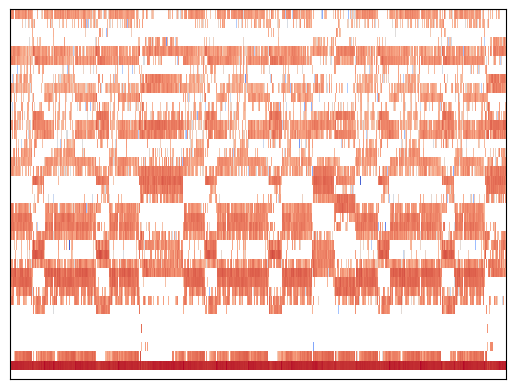

In [38]:
#Рассмотрим визуализацию мел-коэффициентов на примере первого аудио
import numpy as np
import librosa
mels_one = mel_transform(audios[0])
librosa.display.specshow(np.log1p(mels_one.numpy()[:, :1000]))

По полученной спектрограмме мы можем увидеть, что присутствует разная частота сигнала, при этом интенсивность на разных "уровнях" внутри себя примерно одинаковая. Как таковых скачков и переходов не наблюдается, разве что в начале и конце (что логично - начало и конец композиции)

In [39]:
from sklearn.manifold import TSNE

embs = TSNE(n_components=2, perplexity=1.5).fit_transform(torch.stack(mfcc))

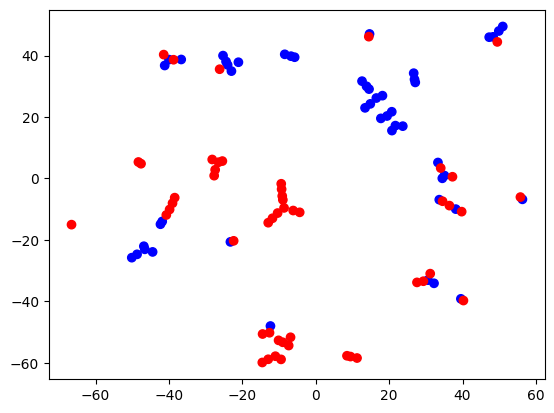

In [42]:
# полученные с помощью мел-преобразования усредненные эмбеддинги разделяются по жанрам (какой исполнитель, какому жанру принадлежит. То, что размечалось выше)
import matplotlib.pyplot as plt
colors = ['blue' if artist_i == 0 else 'red' if artist_i == 1 else "white" for artist_i in artist_labels]

plt.scatter(embs[:, 0], embs[:, 1], c=colors)
plt.show()

Кодируем метки

In [3]:
#Восстановление тензоров меток из файла
import csv
import torch
import numpy as np

def load_mfcc_from_csv(filename):
    mfcc = []
    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Преобразуем строку из CSV в numpy массив и затем в torch Tensor
            mfcc.append(torch.Tensor(np.array(row, dtype=np.float32)))
    return mfcc

# Загрузка MFCC из файла
mfcc = load_mfcc_from_csv('mfcc_output.csv')

# Проверка на вывод
for i, t in enumerate(mfcc[:5]):  # Печатаем первые 5 примеров для проверки
    print(f'MFCC {i + 1}: {t}')


MFCC 1: tensor([-108.2913,   49.5634,    6.5867,   -2.2822,  -15.0913,  -16.9882,
         -16.9204,   -8.3872,   -7.5990,   -2.9017,   -2.6610,    1.5988,
          -8.2738,   -3.1945,   -8.8956,   -2.5323,   -7.8395,   -5.8930,
         -10.9848,   -4.0830,   -7.6019,   -1.2969,   -2.5207,    3.4960,
           1.7545,    5.2709,    3.7981,    9.7894,    3.2598,    6.2741,
           1.1661,    2.4266,   -5.6150,   -1.4368,   -7.0914,   -6.0522,
         -12.2938,   -9.3101,  -12.3310,   -6.9381])
MFCC 2: tensor([-121.0478,   74.1888,  -21.6466,   -9.4654,  -21.9804,  -13.5720,
         -14.4308,   -5.4605,   -9.8770,   -2.9259,   -2.3179,    1.0340,
          -6.6118,   -2.0979,   -8.3919,   -4.2026,  -10.1926,   -4.1213,
         -10.6287,   -4.0864,   -7.6053,   -2.4576,   -6.3705,    0.8387,
          -0.3814,    3.0429,    1.1227,    8.3010,    1.9892,    6.4939,
           1.1472,    1.7716,   -4.7720,   -2.2520,   -6.4079,   -6.0621,
         -12.9777,   -9.0698,  -11.0458,   

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
print(y_encoded)
print(len(y_encoded))
print(y_encoded.shape)
y_one_hot = to_categorical(y_encoded)
print(y_one_hot)
print(len(y_one_hot))

[11 74 44  3 80  1  6 25 61  1 56 32 60 38 35 45 16 81  7 59 55 79 27 38
 25 79 43  8 62 53 56 56 50  9 65 14 55 58  4 36 16 15 25 25 79 34 40 26
 71 48 72 73 64 12 75 28  5 42 63 18 46 17 69 37 66 20 70 54 23 31 41 12
 23 82 47 52 51  2 33 76 22 24 13 78 18 39 30 19  0 51 67 77 57 68 49 68
  0 21 23 13 29 10]
102
(102,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
102


In [9]:
print(y_one_hot.shape)

(102, 83)


Разделение датасета на выборки

In [38]:
from sklearn.model_selection import train_test_split
mfcc_array = np.array(mfcc)

X_train, X_test, y_train, y_test = train_test_split(mfcc_array, y_encoded, test_size=0.2, random_state=42)
print(f'Размеры выборок: Обучающая: {X_train.shape} Тестовая: {X_test.shape}')
print(y_train.shape, y_test.shape)

Размеры выборок: Обучающая: (81, 40) Тестовая: (21, 40)
(81,) (21,)


In [39]:
# Паддинг последовательностей
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = max(max(len(seq) for seq in X_train), max(len(seq) for seq in X_test))
X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

In [40]:
X_train_tensor = torch.tensor(X_train_padded, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_padded, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

Реализация модели с помощью LSTM ячейки

In [77]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Используем последний выход LSTM
        return out

In [78]:
# Параметры модели
input_size = mfcc_array.shape[1]  # Размер входа (количество признаков MFCC)
hidden_size = 128  # Размер скрытого слоя
output_size = len(label_encoder.classes_)  # Количество классов

# Создание модели
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Обучение модели

Epoch [1/200], Train Loss: 4.4117, Test Loss: 4.4356
Epoch [2/200], Train Loss: 4.3630, Test Loss: 4.4530
Epoch [3/200], Train Loss: 4.3166, Test Loss: 4.4693
Epoch [4/200], Train Loss: 4.2734, Test Loss: 4.4853
Epoch [5/200], Train Loss: 4.2325, Test Loss: 4.5019
Epoch [6/200], Train Loss: 4.1924, Test Loss: 4.5201
Epoch [7/200], Train Loss: 4.1523, Test Loss: 4.5407
Epoch [8/200], Train Loss: 4.1118, Test Loss: 4.5639
Epoch [9/200], Train Loss: 4.0710, Test Loss: 4.5892
Epoch [10/200], Train Loss: 4.0300, Test Loss: 4.6165
Epoch [11/200], Train Loss: 3.9888, Test Loss: 4.6455
Epoch [12/200], Train Loss: 3.9476, Test Loss: 4.6756
Epoch [13/200], Train Loss: 3.9059, Test Loss: 4.7059
Epoch [14/200], Train Loss: 3.8637, Test Loss: 4.7361
Epoch [15/200], Train Loss: 3.8209, Test Loss: 4.7662
Epoch [16/200], Train Loss: 3.7773, Test Loss: 4.7959
Epoch [17/200], Train Loss: 3.7331, Test Loss: 4.8246
Epoch [18/200], Train Loss: 3.6885, Test Loss: 4.8520
Epoch [19/200], Train Loss: 3.6440, T

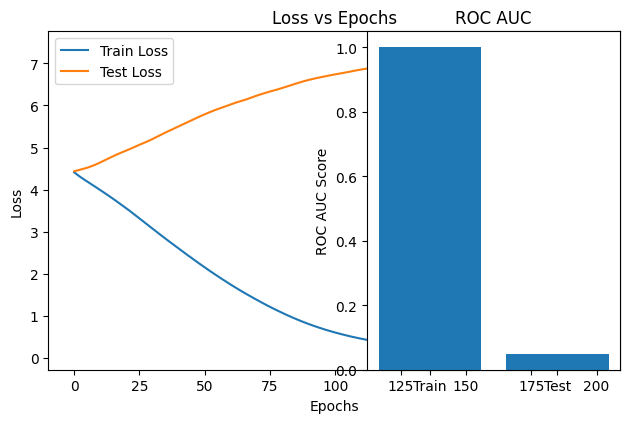

In [79]:
num_epochs = 200
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor.unsqueeze(1))  # Добавляем размерность для батча
    loss = criterion(outputs, y_train_tensor.long())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())


    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))
        test_loss = criterion(test_outputs, y_test_tensor.long())
        test_losses.append(test_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Сравнение метрик
y_train_pred = torch.argmax(model(X_train_tensor.unsqueeze(1)), dim=1).numpy()
y_test_pred = torch.argmax(model(X_test_tensor.unsqueeze(1)), dim=1).numpy()

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Построение графиков потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# График ROC AUC
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy])
plt.title('ROC AUC')
plt.ylabel('ROC AUC Score')

plt.tight_layout()
plt.show()


Усложним модель и проведем подбор гиперпараметров

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
!pip install optuna
import optuna

class LSTMModel1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel1, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.batchnorm = nn.BatchNorm1d(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.batchnorm(lstm_out[:, -1, :])  # Используем последний выход LSTM
        out = self.dropout(out)
        out = self.fc(out)
        return out


In [86]:
def train_and_evaluate(trial):
    input_size = mfcc_array.shape[1]  # Размер входа (количество признаков MFCC)
    output_size = len(label_encoder.classes_)  # Количество классов
    # Гиперпараметры
    hidden_size = trial.suggest_int('hidden_size', 64, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    num_epochs = trial.suggest_int('num_epochs', 10, 50)
    batch_size = trial.suggest_int('batch_size', 16, 64)

    model = LSTMModel1(input_size=input_size, hidden_size=hidden_size,
                      output_size=output_size, dropout_rate=dropout_rate)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    num_epochs = 100
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor.unsqueeze(1))  # Добавляем размерность для батча
        loss = criterion(outputs, y_train_tensor.long())
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())


        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor.unsqueeze(1))
            test_loss = criterion(test_outputs, y_test_tensor.long())
            test_losses.append(test_loss.item())

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        # Сравнение метрик
        y_train_pred = torch.argmax(model(X_train_tensor.unsqueeze(1)), dim=1).numpy()
        y_test_pred = torch.argmax(model(X_test_tensor.unsqueeze(1)), dim=1).numpy()

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
        return test_accuracy

In [88]:
study = optuna.create_study(direction='maximize')
study.optimize(train_and_evaluate, n_trials=50)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best ROC AUC: ", study.best_value)


[I 2024-12-17 15:11:47,881] A new study created in memory with name: no-name-8a8655c1-ec1b-42cf-817a-da8424eccec9
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:48,011] Trial 0 finished with value: 0.0 and parameters: {'hidden_size': 85, 'dropout_rate': 0.4680079176924705, 'learning_rate': 0.0014720610282227136, 'num_epochs': 45, 'batch_size': 38}. Best is trial 0 with value: 0.0.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11

Epoch [1/100], Train Loss: 4.6620, Test Loss: 4.4287
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6641, Test Loss: 4.4590
Train Accuracy: 0.0494, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6010, Test Loss: 4.4478
Train Accuracy: 0.0247, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:48,211] Trial 3 finished with value: 0.0 and parameters: {'hidden_size': 96, 'dropout_rate': 0.229520899167688, 'learning_rate': 0.006033427333080237, 'num_epochs': 19, 'batch_size': 18}. Best is trial 0 with value: 0.0.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:48,263] Trial 4 finished with value: 0.0 and parameters: {'hidden_size': 96, 'dropout_rate': 0.3526471916712215, 'l

Epoch [1/100], Train Loss: 4.5519, Test Loss: 4.4435
Train Accuracy: 0.0741, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5918, Test Loss: 4.5409
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5278, Test Loss: 4.4898
Train Accuracy: 0.0247, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6307, Test Loss: 4.4194
Train Accuracy: 0.0247, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:48,464] Trial 7 finished with value: 0.047619047619047616 and parameters: {'hidden_size': 121, 'dropout_rate': 0.14127014136390562, 'learning_rate': 0.010179894331227133, 'num_epochs': 44, 'batch_size': 41}. Best is trial 7 with value: 0.047619047619047616.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:48,557] Trial 8 finished with value: 0.0 and parameters: {'hidden_size': 83, '

Epoch [1/100], Train Loss: 4.5343, Test Loss: 4.4459
Train Accuracy: 0.0864, Test Accuracy: 0.0476
Epoch [1/100], Train Loss: 4.6245, Test Loss: 4.4530
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5293, Test Loss: 4.4295
Train Accuracy: 0.0000, Test Accuracy: 0.0000

[I 2024-12-17 15:11:48,667] Trial 9 finished with value: 0.0 and parameters: {'hidden_size': 113, 'dropout_rate': 0.4551394512235819, 'learning_rate': 3.7826622095901966e-05, 'num_epochs': 34, 'batch_size': 28}. Best is trial 7 with value: 0.047619047619047616.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


[I 2024-12-17 15:11:48,998] Trial 10 finished with value: 0.09523809523809523 and parameters: {'hidden_size': 127, 'dropout_rate': 0.2184663185138595, 'learning_rate': 0.0002874089390108436, 'num_epochs': 10, 'batch_size': 43}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.4823, Test Loss: 4.4132
Train Accuracy: 0.0247, Test Accuracy: 0.0952


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:49,256] Trial 11 finished with value: 0.0 and parameters: {'hidden_size': 126, 'dropout_rate': 0.21152126945210695, 'learning_rate': 0.00023562345329572882, 'num_epochs': 10, 'batch_size': 43}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.5529, Test Loss: 4.3663
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:49,516] Trial 12 finished with value: 0.0 and parameters: {'hidden_size': 126, 'dropout_rate': 0.20931112035511806, 'learning_rate': 0.00032881997530117055, 'num_epochs': 24, 'batch_size': 35}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.6185, Test Loss: 4.4517
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:49,832] Trial 13 finished with value: 0.0 and parameters: {'hidden_size': 115, 'dropout_rate': 0.26791769920859404, 'learning_rate': 0.061365484929802816, 'num_epochs': 10, 'batch_size': 51}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.5977, Test Loss: 4.6524
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:50,013] Trial 14 finished with value: 0.0 and parameters: {'hidden_size': 117, 'dropout_rate': 0.1774127803466976, 'learning_rate': 0.0006083042076513452, 'num_epochs': 41, 'batch_size': 49}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


Epoch [1/100], Train Loss: 4.5828, Test Loss: 4.4470
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.4427, Test Loss: 4.4410


[I 2024-12-17 15:11:50,212] Trial 15 finished with value: 0.047619047619047616 and parameters: {'hidden_size': 107, 'dropout_rate': 0.10633612089928215, 'learning_rate': 0.014122939199797119, 'num_epochs': 49, 'batch_size': 32}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:50,379] Trial 16 finished with value: 0.0 and parameters: {'hidden_size': 127, 'dropout_rate': 0.2789321614654672, 'learning_rate': 7.465819845689212e-05, 'num_epochs': 16, 'batch_size': 45}. Best is trial 10 with value: 0.09523809523809523.


Train Accuracy: 0.0370, Test Accuracy: 0.0476
Epoch [1/100], Train Loss: 4.6943, Test Loss: 4.4790
Train Accuracy: 0.0247, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:50,507] Trial 17 finished with value: 0.0 and parameters: {'hidden_size': 119, 'dropout_rate': 0.15746122446886102, 'learning_rate': 0.0007622666859322113, 'num_epochs': 28, 'batch_size': 64}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:50,610] Trial 18 finished with value: 0.0 and parameters: {'hidden_size': 106, 'dropout_rate'

Epoch [1/100], Train Loss: 4.6928, Test Loss: 4.3854
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5378, Test Loss: 4.3923
Train Accuracy: 0.0247, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:50,759] Trial 19 finished with value: 0.047619047619047616 and parameters: {'hidden_size': 121, 'dropout_rate': 0.17677557863429147, 'learning_rate': 0.008235913577466626, 'num_epochs': 18, 'batch_size': 57}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


Epoch [1/100], Train Loss: 4.6036, Test Loss: 4.4890
Train Accuracy: 0.0741, Test Accuracy: 0.0476


[I 2024-12-17 15:11:50,976] Trial 20 finished with value: 0.0 and parameters: {'hidden_size': 111, 'dropout_rate': 0.4026784615377406, 'learning_rate': 0.09612596249044798, 'num_epochs': 42, 'batch_size': 48}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


Epoch [1/100], Train Loss: 4.6467, Test Loss: 4.6812
Train Accuracy: 0.0370, Test Accuracy: 0.0000


[I 2024-12-17 15:11:51,176] Trial 21 finished with value: 0.0 and parameters: {'hidden_size': 106, 'dropout_rate': 0.11514154124209208, 'learning_rate': 0.02279355779642151, 'num_epochs': 50, 'batch_size': 37}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:51,332] Trial 22 finished with value: 0.0 and parameters: {'hidden_size': 122, 'dropout_rate': 0.1381822546879909, 'learning_rate': 0.015931988758004317, 'num_epochs': 50, 'batch_size': 30}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.6918, Test Loss: 4.4889
Train Accuracy: 0.0494, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6066, Test Loss: 4.4718
Train Accuracy: 0.0617, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:51,560] Trial 23 finished with value: 0.0 and parameters: {'hidden_size': 110, 'dropout_rate': 0.18625790228645456, 'learning_rate': 0.003571871195782191, 'num_epochs': 46, 'batch_size': 33}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:51,687] Trial 24 finished with value: 0.0 and parameters: {'hidden_size': 102, 'dropout_rate':

Epoch [1/100], Train Loss: 4.6330, Test Loss: 4.4231
Train Accuracy: 0.0370, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6250, Test Loss: 4.5770
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:51,918] Trial 25 finished with value: 0.0 and parameters: {'hidden_size': 128, 'dropout_rate': 0.1404530059685571, 'learning_rate': 0.005143713232029496, 'num_epochs': 48, 'batch_size': 46}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,005] Trial 26 finished with value: 0.0 and parameters: {'hidden_size': 121, 'dropout_rate': 

Epoch [1/100], Train Loss: 4.6104, Test Loss: 4.5242
Train Accuracy: 0.0988, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5709, Test Loss: 4.4919
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.4913, Test Loss: 4.4369
Train Accuracy: 0.0864, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,204] Trial 28 finished with value: 0.0 and parameters: {'hidden_size': 108, 'dropout_rate': 0.16142919372790682, 'learning_rate': 0.000282077750065219, 'num_epochs': 45, 'batch_size': 56}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,368] Trial 29 finished with value: 0.0 and parameters: {'hidden_size': 99, 'dropout_rate': 

Epoch [1/100], Train Loss: 4.5701, Test Loss: 4.4681
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.4122, Test Loss: 4.4746
Train Accuracy: 0.0370, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,591] Trial 30 finished with value: 0.0 and parameters: {'hidden_size': 124, 'dropout_rate': 0.126186378014566, 'learning_rate': 9.949345144288254e-05, 'num_epochs': 44, 'batch_size': 37}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,676] Trial 31 finished with value: 0.0 and parameters: {'hidden_size': 118, 'dropout_rate': 

Epoch [1/100], Train Loss: 4.5219, Test Loss: 4.3977
Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6955, Test Loss: 4.4399
Train Accuracy: 0.0494, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:52,849] Trial 32 finished with value: 0.0 and parameters: {'hidden_size': 89, 'dropout_rate': 0.1956608592589152, 'learning_rate': 0.020486298041522723, 'num_epochs': 13, 'batch_size': 55}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,005] Trial 33 finished with value: 0.09523809523809523 and parameters: {'hidden_size': 122, '

Epoch [1/100], Train Loss: 4.5871, Test Loss: 4.4721
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5893, Test Loss: 4.4112
Train Accuracy: 0.0494, Test Accuracy: 0.0952


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,251] Trial 34 finished with value: 0.0 and parameters: {'hidden_size': 113, 'dropout_rate': 0.10525850738219915, 'learning_rate': 0.0028384359272027445, 'num_epochs': 22, 'batch_size': 23}. Best is trial 10 with value: 0.09523809523809523.


Epoch [1/100], Train Loss: 4.6311, Test Loss: 4.4472
Train Accuracy: 0.0617, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,504] Trial 35 finished with value: 0.0 and parameters: {'hidden_size': 65, 'dropout_rate': 0.14424461420265586, 'learning_rate': 0.00588599973099232, 'num_epochs': 21, 'batch_size': 16}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,679] Trial 36 finished with value: 0.0 and parameters: {'hidden_size': 123, 'dropout_rate': 0

Epoch [1/100], Train Loss: 4.6240, Test Loss: 4.4021
Train Accuracy: 0.0247, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5312, Test Loss: 4.4748
Train Accuracy: 0.0370, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,872] Trial 37 finished with value: 0.0 and parameters: {'hidden_size': 128, 'dropout_rate': 0.11881159675988724, 'learning_rate': 0.0005476284266577112, 'num_epochs': 19, 'batch_size': 28}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:53,995] Trial 38 finished with value: 0.0 and parameters: {'hidden_size': 89, 'dropout_rate':

Epoch [1/100], Train Loss: 4.4300, Test Loss: 4.4299
Train Accuracy: 0.0247, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6209, Test Loss: 4.3880
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:54,153] Trial 39 finished with value: 0.0 and parameters: {'hidden_size': 113, 'dropout_rate': 0.10081445160806946, 'learning_rate': 0.011527145292430445, 'num_epochs': 12, 'batch_size': 21}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:54,322] Trial 40 finished with value: 0.0 and parameters: {'hidden_size': 74, 'dropout_rate': 

Epoch [1/100], Train Loss: 4.4937, Test Loss: 4.4570
Train Accuracy: 0.0494, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6088, Test Loss: 4.4276
Train Accuracy: 0.0247, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:54,450] Trial 41 finished with value: 0.0 and parameters: {'hidden_size': 121, 'dropout_rate': 0.1775417099085911, 'learning_rate': 0.007895625122065465, 'num_epochs': 18, 'batch_size': 61}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:54,613] Trial 42 finished with value: 0.0 and parameters: {'hidden_size': 120, 'dropout_rate': 

Epoch [1/100], Train Loss: 4.5405, Test Loss: 4.5168
Train Accuracy: 0.0864, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6165, Test Loss: 4.4905
Train Accuracy: 0.0370, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:54,946] Trial 43 finished with value: 0.0 and parameters: {'hidden_size': 124, 'dropout_rate': 0.21947455712792358, 'learning_rate': 0.028588206531218293, 'num_epochs': 17, 'batch_size': 54}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:55,074] Trial 44 finished with value: 0.0 and parameters: {'hidden_size': 116, 'dropout_rate':

Epoch [1/100], Train Loss: 4.6268, Test Loss: 4.3567
Train Accuracy: 0.0000, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.5813, Test Loss: 4.3861
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:55,193] Trial 45 finished with value: 0.047619047619047616 and parameters: {'hidden_size': 125, 'dropout_rate': 0.49661874687075763, 'learning_rate': 0.0077785867759776845, 'num_epochs': 26, 'batch_size': 49}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:55,299] Trial 46 finished with value: 0.0 and parameters: {'hidden_size': 11

Epoch [1/100], Train Loss: 4.7717, Test Loss: 4.4300
Train Accuracy: 0.0370, Test Accuracy: 0.0476
Epoch [1/100], Train Loss: 4.5416, Test Loss: 4.3888
Train Accuracy: 0.0123, Test Accuracy: 0.0000


<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:55,404] Trial 47 finished with value: 0.09523809523809523 and parameters: {'hidden_size': 102, 'dropout_rate': 0.19223233722586933, 'learning_rate': 0.0018345069403045188, 'num_epochs': 35, 'batch_size': 62}. Best is trial 10 with value: 0.09523809523809523.
<ipython-input-86-9d4808739980>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-12-17 15:11:55,504] Trial 48 finished with value: 0.0 and parameters: {'hidden_size': 92,

Epoch [1/100], Train Loss: 4.6831, Test Loss: 4.3598
Train Accuracy: 0.0000, Test Accuracy: 0.0952
Epoch [1/100], Train Loss: 4.6965, Test Loss: 4.4356
Train Accuracy: 0.0123, Test Accuracy: 0.0000
Epoch [1/100], Train Loss: 4.6044, Test Loss: 4.4384
Train Accuracy: 0.0370, Test Accuracy: 0.0000
Best hyperparameters:  {'hidden_size': 127, 'dropout_rate': 0.2184663185138595, 'learning_rate': 0.0002874089390108436, 'num_epochs': 10, 'batch_size': 43}
Best ROC AUC:  0.09523809523809523


"Усовершенствованная" модель

In [93]:
class LSTMModel2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(LSTMModel2, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, batch_first=True, bidirectional=True)
        self.batchnorm = nn.BatchNorm1d(hidden_size * 2)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_size * 2, 64)  # Добавляем скрытый слой
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm1(x)
        lstm_out, _ = self.lstm2(lstm_out)
        out = self.batchnorm(lstm_out[:, -1, :])  # Используем последний выход LSTM
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [94]:
# Параметры модели
input_size = mfcc_array.shape[1]  # Размер входа (количество признаков MFCC)
output_size = len(label_encoder.classes_)  # Количество классов
# Гиперпараметры
hidden_size = 126
dropout_rate = 0.25
learning_rate = 0.012
num_epochs = 10
batch_size = 43

model = LSTMModel(input_size=input_size, hidden_size=hidden_size,
                      output_size=output_size, dropout_rate=dropout_rate)

#Создание модели
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Epoch [1/34], Train Loss: 4.4657, Test Loss: 4.4352
Epoch [2/34], Train Loss: 4.1867, Test Loss: 4.4653
Epoch [3/34], Train Loss: 3.6356, Test Loss: 4.5337
Epoch [4/34], Train Loss: 3.1244, Test Loss: 4.6569
Epoch [5/34], Train Loss: 2.5387, Test Loss: 4.7933
Epoch [6/34], Train Loss: 2.0442, Test Loss: 4.9475
Epoch [7/34], Train Loss: 1.6812, Test Loss: 5.1053
Epoch [8/34], Train Loss: 1.2836, Test Loss: 5.2734
Epoch [9/34], Train Loss: 0.9570, Test Loss: 5.6144
Epoch [10/34], Train Loss: 0.6585, Test Loss: 6.1535
Epoch [11/34], Train Loss: 0.4514, Test Loss: 6.4861
Epoch [12/34], Train Loss: 0.3358, Test Loss: 6.8003
Epoch [13/34], Train Loss: 0.1863, Test Loss: 7.0508
Epoch [14/34], Train Loss: 0.1840, Test Loss: 7.5372
Epoch [15/34], Train Loss: 0.1218, Test Loss: 8.0156
Epoch [16/34], Train Loss: 0.0846, Test Loss: 8.5788
Epoch [17/34], Train Loss: 0.0768, Test Loss: 8.9322
Epoch [18/34], Train Loss: 0.0504, Test Loss: 9.3861
Epoch [19/34], Train Loss: 0.0791, Test Loss: 10.2257
E

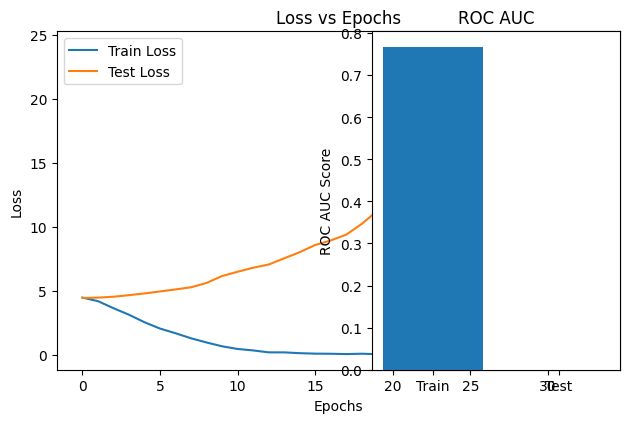

In [72]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor.unsqueeze(1))  # Добавляем размерность для батча
    loss = criterion(outputs, y_train_tensor.long())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())


    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))
        test_loss = criterion(test_outputs, y_test_tensor.long())
        test_losses.append(test_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Сравнение метрик
y_train_pred = torch.argmax(model(X_train_tensor.unsqueeze(1)), dim=1).numpy()
y_test_pred = torch.argmax(model(X_test_tensor.unsqueeze(1)), dim=1).numpy()

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Построение графиков потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# График ROC AUC
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy])
plt.title('ROC AUC')
plt.ylabel('ROC AUC Score')

plt.tight_layout()
plt.show()


Epoch [1/10], Train Loss: 4.5518, Test Loss: 4.3989
Epoch [2/10], Train Loss: 3.8119, Test Loss: 4.3504
Epoch [3/10], Train Loss: 3.0862, Test Loss: 4.3409
Epoch [4/10], Train Loss: 2.5440, Test Loss: 4.4100
Epoch [5/10], Train Loss: 2.0498, Test Loss: 4.4639
Epoch [6/10], Train Loss: 1.7354, Test Loss: 4.5081
Epoch [7/10], Train Loss: 1.3646, Test Loss: 4.5007
Epoch [8/10], Train Loss: 1.0851, Test Loss: 4.4785
Epoch [9/10], Train Loss: 0.8094, Test Loss: 4.5127
Epoch [10/10], Train Loss: 0.6738, Test Loss: 4.5988
Train Accuracy: 0.9506, Test Accuracy: 0.0952


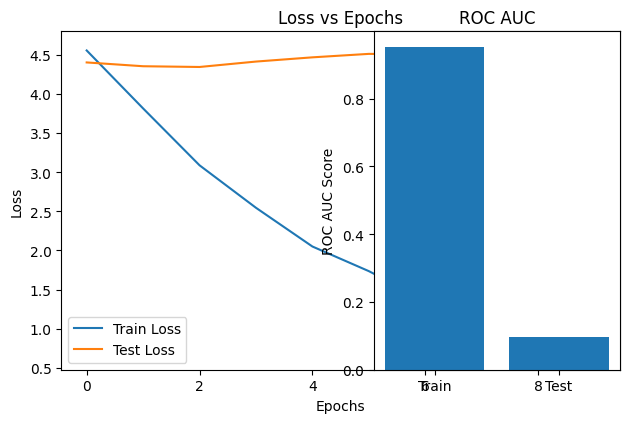

In [95]:
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor.unsqueeze(1))  # Добавляем размерность для батча
    loss = criterion(outputs, y_train_tensor.long())
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())


    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor.unsqueeze(1))
        test_loss = criterion(test_outputs, y_test_tensor.long())
        test_losses.append(test_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Сравнение метрик
y_train_pred = torch.argmax(model(X_train_tensor.unsqueeze(1)), dim=1).numpy()
y_test_pred = torch.argmax(model(X_test_tensor.unsqueeze(1)), dim=1).numpy()

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Построение графиков потерь
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# График ROC AUC
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy])
plt.title('ROC AUC')
plt.ylabel('ROC AUC Score')

plt.tight_layout()
plt.show()


Маленькое значение на тест возникает вероятней всего из-за маленького размера итоговой тестовой выборки

Создание эмбеддингов аудио

In [96]:
model.eval()
with torch.no_grad():
    embeddings_train = model.lstm(X_train_tensor.unsqueeze(1))[0][:, -1, :].numpy()  # Последний выход LSTM для обучающей выборки
    embeddings_test = model.lstm(X_test_tensor.unsqueeze(1))[0][:, -1, :].numpy()  # Последний выход LSTM для тестовой выборки

# Объединяем эмбеддинги
embeddings = np.concatenate((embeddings_train, embeddings_test), axis=0)
labels_combined = np.concatenate((y_train, y_test), axis=0)


In [97]:
print(embeddings_test)

[[ 1.85738564e-01  2.59734611e-06  7.61590242e-01 ... -6.45801192e-04
  -1.16282791e-01 -6.27437949e-01]
 [ 2.96988469e-02 -8.45663249e-04  5.41558504e-01 ... -5.28198421e-01
  -1.20796205e-04 -2.80065030e-01]
 [ 5.94783500e-02 -2.44910736e-03  6.75081462e-02 ... -5.49119949e-01
  -7.44804129e-05 -3.37274849e-01]
 ...
 [-2.66561117e-02  1.43591587e-05  7.61530876e-01 ... -4.82598413e-03
   1.89115368e-02 -5.05800903e-01]
 [-2.35252038e-01  5.14148297e-08  7.61572421e-01 ... -7.57144764e-04
  -4.80004493e-03 -6.14914477e-01]
 [ 1.85556307e-01 -3.30019626e-04  4.15295750e-01 ... -2.96328574e-01
  -1.29202968e-02 -5.24903715e-01]]


Визуализация эмбеддингов с использованием t-SNЕ

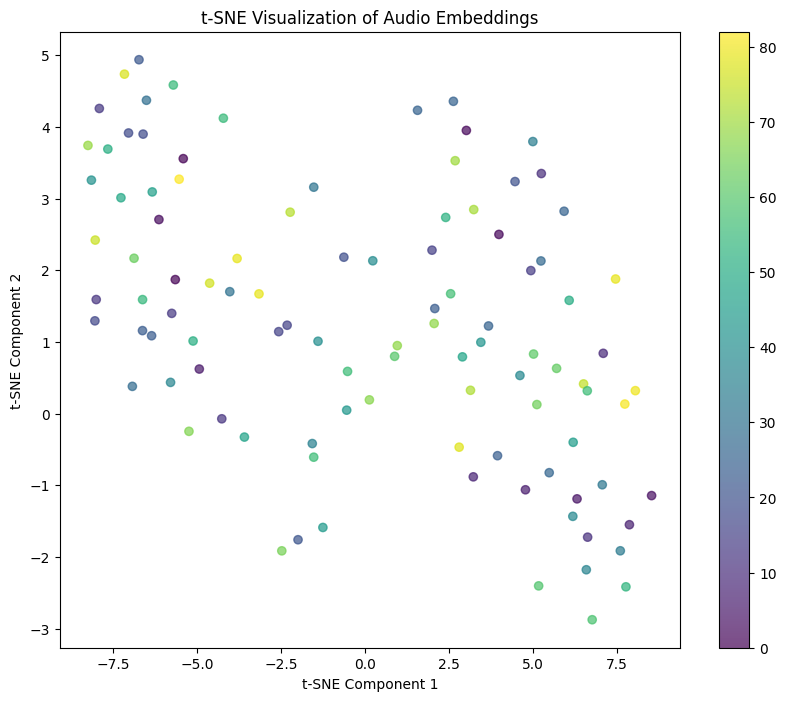

In [98]:
from sklearn.manifold import TSNE

# Применение t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels_combined, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Audio Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Визуальное решение задачи относительно меток, которые мы изначально получади доя сравнения

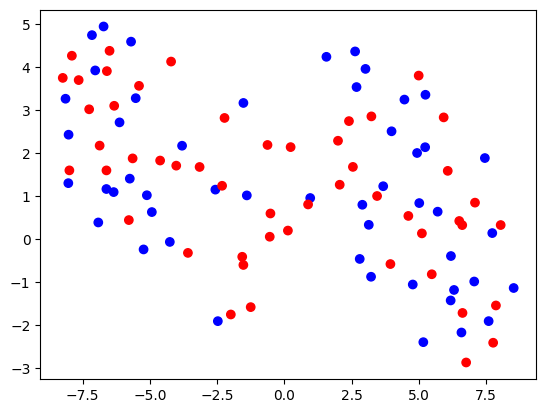

In [104]:
# полученные с помощью мел-преобразования усредненные эмбеддинги разделяются по жанрам (какой исполнитель, какому жанру принадлежит. То, что размечалось выше)
import matplotlib.pyplot as plt
colors = ['blue' if artist_i == 0 else 'red' if artist_i == 1 else "white" for artist_i in artist_labels]

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
plt.show()

Итого также получилось поровну исполнителей каждого жанра